In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

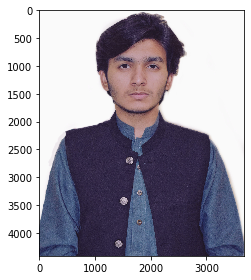

In [3]:
image = imread('profile.jpeg')
imshow(image)

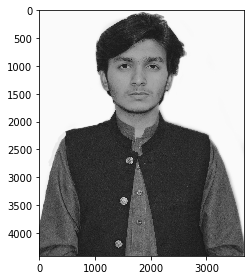

In [4]:
image1 = imread('profile.jpeg', as_gray=True)
imshow(image1)

In [6]:
#Shape of images
print(image.shape)
print(image1.shape)
k = image1.shape

(4412, 3678, 3)
(4412, 3678)


3678

In [9]:
print(image.size)
print(image1.size)

48682008
16227336


**Feature extraction**

1. Pixel Features

In [7]:
pixel_feat1 = np.reshape(image1, (k[0] * k[1]))
pixel_feat1

array([0.97254902, 0.97254902, 0.97254902, ..., 0.68187686, 0.69364157,
       0.72893569])

In [33]:
pixel_feat2 = np.reshape(image, (4412 * 3678 * 3))
pixel_feat2

array([248, 248, 248, ..., 180, 186, 202], dtype=uint8)

2. Edge Features

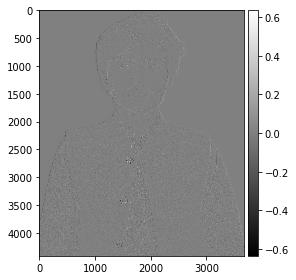

In [56]:
# from skimage import filters
# from skimage import feature
# from skimage.filters import prewitt_h,prewitt_v
from skimage import filters,feature
from skimage.filters import prewitt_h,prewitt_v
# prewitt kernel
pre_hor = prewitt_h(image1)
pre_ver = prewitt_v(image1)
# Sobel Kernel
ed_sobel = filters.sobel(image1)

#canny algorithm
can = feature.canny(image1)

imshow(pre_ver, cmap='gray');

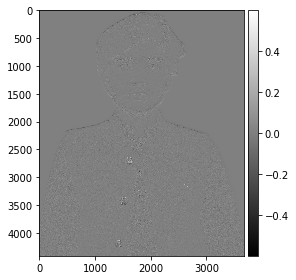

In [39]:
imshow(pre_hor, cmap='gray');

C:\Users\Latitude\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


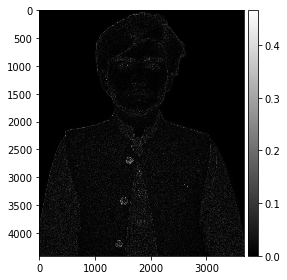

In [44]:
imshow(ed_sobel, cmap='gray');

In [57]:
# imshow(can, cmap='gray')

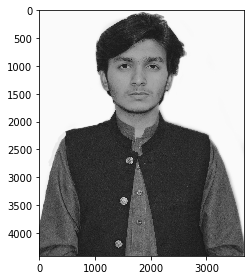

In [11]:
from skimage import color 
grayscale = color.rgb2gray(image)

imshow(grayscale)
plt.show()

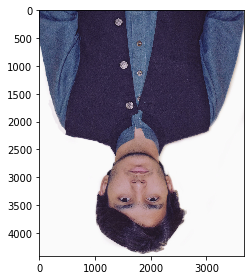

In [12]:
# Flip the image in up direction 
verticalflip = np.flipud(image)

imshow(verticalflip)
# plt.show()

(256, 128, 3)


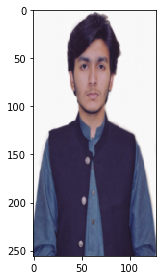

In [9]:
from skimage.transform import resize
resized_img = resize(image, (256,128)) 
imshow(resized_img) ;
print(resized_img.shape)

In [ ]:
# resized_img=image1

In [11]:
from skimage.feature import hog
from skimage import exposure
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)



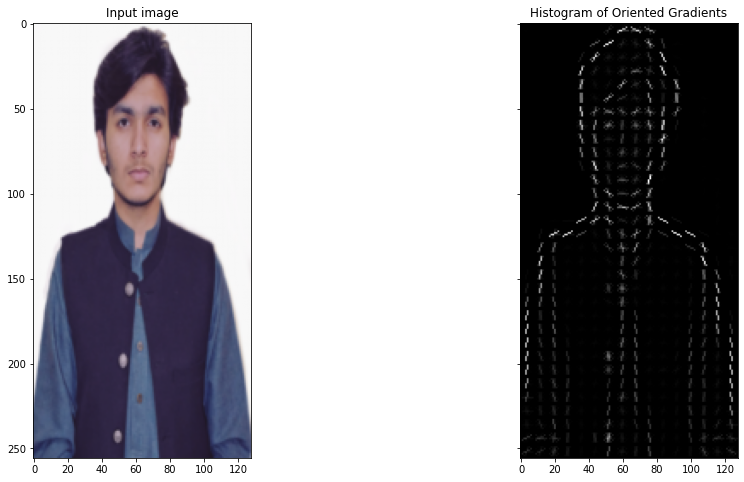

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [60]:
#feature vector
fd

array([0.57735027, 0.        , 0.57735027, ..., 0.27231012, 0.27231012,
       0.09400537])

Text(0.5, 1.0, 'Histogram of oriented Gradients')

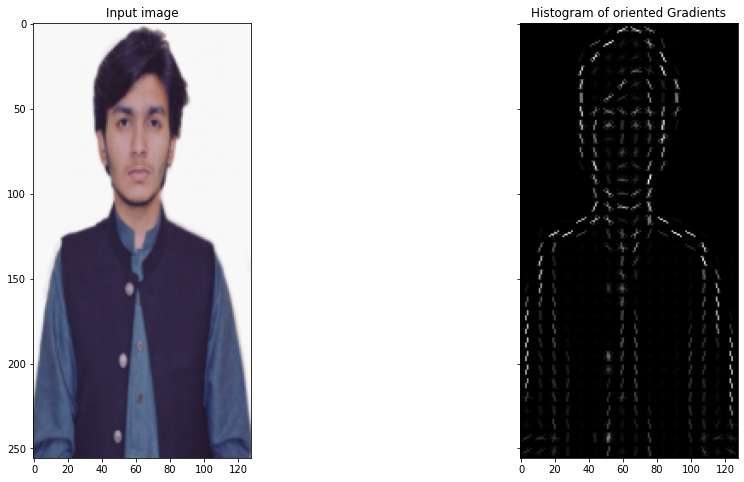

In [8]:
import skimage
from skimage import feature
from skimage.feature import hog
from skimage import exposure
from skimage.io import imshow, imread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
 
mypic = imread('profile.jpeg')
# imshow(mypic)
resized_img = resize(image, (256,128))

fd, hog_img = hog(resized_img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize=True, multichannel=None)

fig, (real_pic,hog_pic) = plt.subplots(1,2,figsize=(16, 8), sharex=True, sharey=True)

real_pic.imshow(resized_img, cmap=plt.cm.gray) 
real_pic.set_title('Input image') 

hog_image_rescale = exposure.rescale_intensity(hog_img, in_range=(0, 10))
hog_pic.imshow(hog_image_rescale, cmap=plt.cm.gray) 
hog_pic.set_title('Histogram of oriented Gradients') 
